In [0]:
#Artificial Neural Network called LSTM(Long Short Term Memory) to predict the closing stock price of corporation using the past 60 day stock price

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [5]:
#Get Stock

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


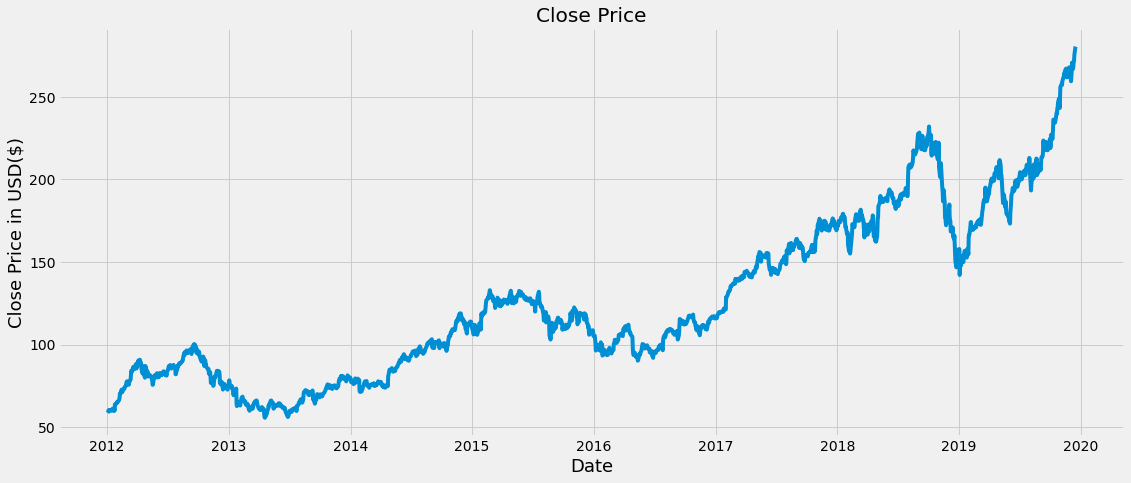

In [6]:
plt.figure(figsize=(17,7))
plt.plot(df['Close'])
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD($)', fontsize=18)

plt.show()


In [7]:
#new df with only close col

data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8) #80% data use as train

training_data_len
# dataset.shape
# data.shape

1603

In [8]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler)
scaled_data = scaler.fit_transform(dataset)
scaled_data

MinMaxScaler(copy=True, feature_range=(0, 1))


array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [12]:
#create the scaled training data

train_data = scaled_data[0:training_data_len,:]
X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
      print(X_train)    #first 0 to 59 and 1 to 60
      print(y_train)    #60 and 61
      print()



[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [33]:
#Convet into numpy array
print(type(X_train))
X_train, y_train = np.array(X_train), np.array(y_train)
type(X_train)
y_train.shape



<class 'numpy.ndarray'>


(1543,)

In [26]:
#reshape the data 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1543, 60, 1)

In [0]:
#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))   #50 nueron
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile

model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
#train

model.fit(X_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 557s 361ms/step - loss: 8.6333e-04


In [0]:
#Create a testing data set
#Create a new array containg scaled val from 1543 to 2003 (remaining data after train)

test_data = scaled_data[training_data_len-60:,:]   #we start train_loop from 60  some confusion

X_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])


In [0]:
#convert data into numpy array

X_test = np.array(X_test)


In [0]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [0]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)   #we are doing unscaling because we want original value for comparison


In [43]:
# RMSE---root mean squared error

rmse = np.sqrt(np.mean(y_pred - y_test)**2)
rmse

11.6624271774292

                Close
Date                 
2012-01-03  58.747143
2012-01-04  59.062859
2012-01-05  59.718571
2012-01-06  60.342857
2012-01-09  60.247143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


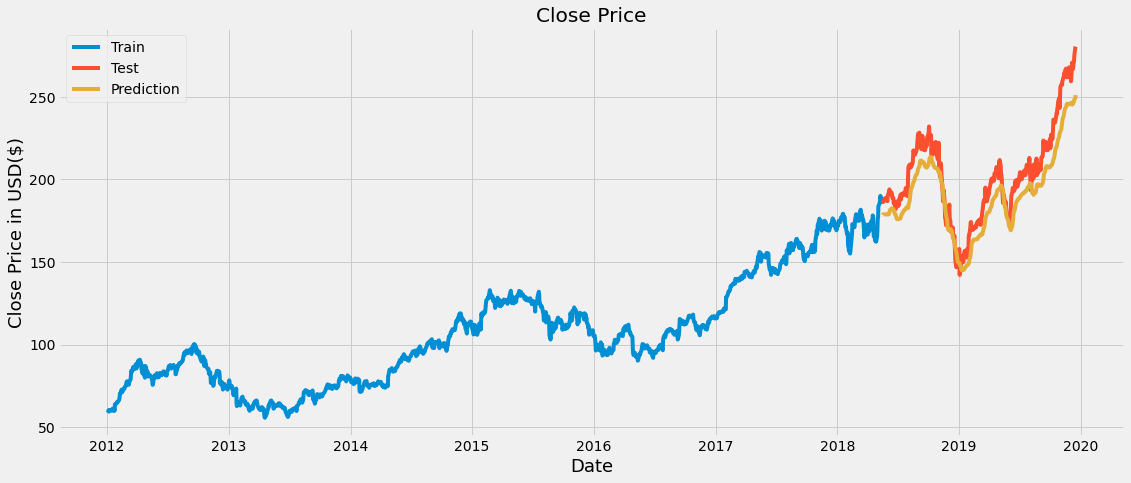

In [46]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
# print(train.head())
valid['Y_pred'] = y_pred   # create like new col means actual price and pred price
plt.figure(figsize=(17,7))
plt.title('Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Y_pred']])
plt.legend(['Train', 'Test', 'Prediction'])
plt.show()



In [45]:
valid

,Close,Y_pred
Date,,
2018-05-17,186.990005,178.530014
2018-05-18,186.309998,178.879669
2018-05-21,187.630005,178.938156
2018-05-22,187.160004,178.944427
2018-05-23,188.360001,178.871201
...,...,...
2019-12-11,270.769989,246.773056
2019-12-12,271.459991,247.523712
2019-12-13,275.149994,248.359070


In [54]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start="2012-01-01", end="2019-12-17")

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

#scaled data 

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)
#numpy array
X_test = np.array(X_test)
#reshape
print(X_test.shape)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get pred scaled price
# print(X_test)
pred_price = model.predict(X_test)
print(pred_price)    #our pred price according to last 60 days
#undo scaling

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)             #for dec 18th 2019


(1, 60, 1)
[[0.87703633]]
[[252.78992]]


In [50]:
apple_quote_2 = web.DataReader('AAPL', data_source='yahoo', start="2019-12-18", end="2019-12-18")
print(apple_quote_2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64


array([[1, 9, 4, 6, 8],
       [7, 4, 4, 2, 1]])

array([[1, 9],
       [4, 6],
       [8, 7],
       [4, 4],
       [2, 1]])